<br><br><center><FONT FACE="cambria" SIZE=20 COLOR="#6C3483 ">
 LEARNING MACHINE </FONT></center>

con outliers

<br><img src="https://i.gifer.com/Egiz.gif">

<br><br><FONT FACE="cambria" SIZE=6 COLOR="#6C3483 ">
SQUAD ETL </FONT>
 
<FONT FACE="calibri" SIZE=4 COLOR="#1ABC9C"> Lien Chin;
<FONT FACE="calibri" SIZE=4 COLOR="#1ABC9C"> Helen Navarro;
<FONT FACE="calibri" SIZE=4 COLOR="#1ABC9C"> Alberto Padilla;
<FONT FACE="calibri" SIZE=4 COLOR="#1ABC9C"> Jessica Lopez.

<p><FONT FACE="calibri" SIZE=5 COLOR="#BD87BB ">
1.Importación de librerias </FONT></p>
 
<br><FONT FACE="calibri" SIZE=4 COLOR="black">
Importar las librerías necesarias para el análisis de datos, preprocesamiento y modelado, como Pandas, NumPy, Scikit-learn, TensorFlow, PyTorch, etc.</FONT> </p>

In [1]:
# Librerias Gráficas 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from pandas.plotting import scatter_matrix # como matriz de relacion entre variables
import graphviz

import os
import base64
from io import BytesIO

# Librerias DF
import pandas as pd
import numpy as np

# Informes
import statsmodels.api as sm # Modelos stadisticos (parecido a R)
from statsmodels.formula.api import ols # Regresión Lineal Ordinaria (OLS)
from statsmodels.stats.outliers_influence import variance_inflation_factor # Multicolinealidad

# Datos Entraniemiento y Prueba
from sklearn.model_selection import train_test_split,cross_val_score # Dividir arreglos o matrices 
                                                                    # en subconjuntos aleatorios de train y prueba.

    
# Modelo Lineal
#from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit  # Curva de Aprendizaje
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Modelo Logístico
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Modelo Clasificación
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# KNN
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

<p><FONT FACE="calibri" SIZE=5 COLOR="#BD87BB">
2.Carga y exploración de los datos </FONT></p>
 

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.columns=['age','work_class','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','TARGET']

In [4]:
df.head() # para ver con que datos y tipos vamos a trabajar

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,TARGET
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df_noduplo = df.drop_duplicates()

## Definicion de la variable independiente y la dependiente

In [6]:
# Variable Objetivo
df_noduplo['TARGET'].copy()

# Variables Independientes
df_noduplo.drop(['TARGET','education_num'], axis=1).copy()

,age,work_class,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


### VALORES PERDIDOS

In [7]:
df_noduplo.isna().sum()

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
TARGET            0
dtype: int64

## Tratamiento de variables independientes (X)

1. Del tipo numéricas

In [8]:
df_noduplo = df.drop_duplicates().copy()


In [9]:
df_noduplo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32536 non-null  int64 
 1   work_class      32536 non-null  object
 2   fnlwgt          32536 non-null  int64 
 3   education       32536 non-null  object
 4   education_num   32536 non-null  int64 
 5   marital_status  32536 non-null  object
 6   occupation      32536 non-null  object
 7   relationship    32536 non-null  object
 8   race            32536 non-null  object
 9   sex             32536 non-null  object
 10  capital_gain    32536 non-null  int64 
 11  capital_loss    32536 non-null  int64 
 12  hours_per_week  32536 non-null  int64 
 13  native_country  32536 non-null  object
 14  TARGET          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


## ANALISIS DE LAS VARIABLES NUMÉRICAS

## Distribución Variables Numericas 

In [10]:
df_numeric = df_noduplo.select_dtypes(include=["int64"])

In [11]:
#only_numeric 
def plot_num (df): 
    
    for column in df_numeric:
    
        graph = sns.histplot(df[column]).set(title = column)
        
        print(graph, plt.show())

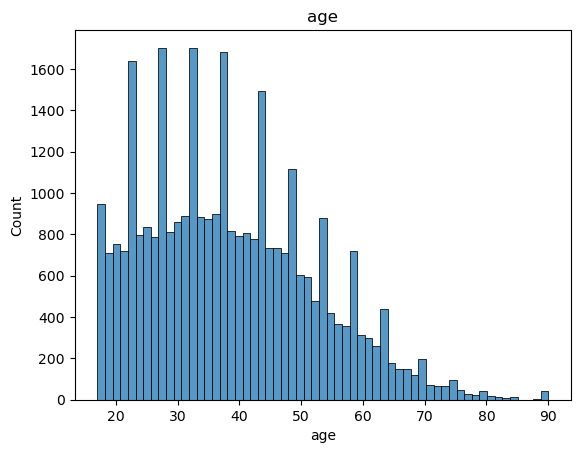

[Text(0.5, 1.0, 'age')] None


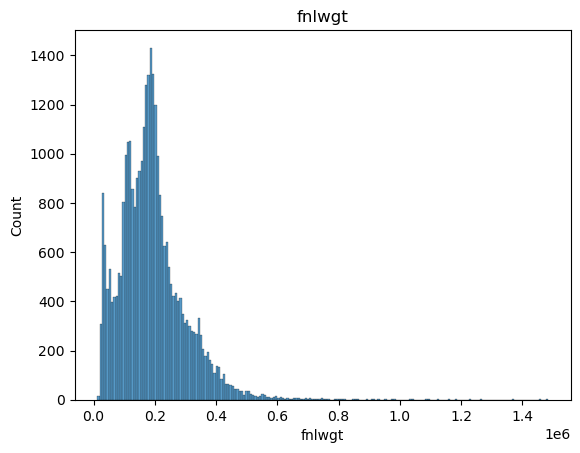

[Text(0.5, 1.0, 'fnlwgt')] None


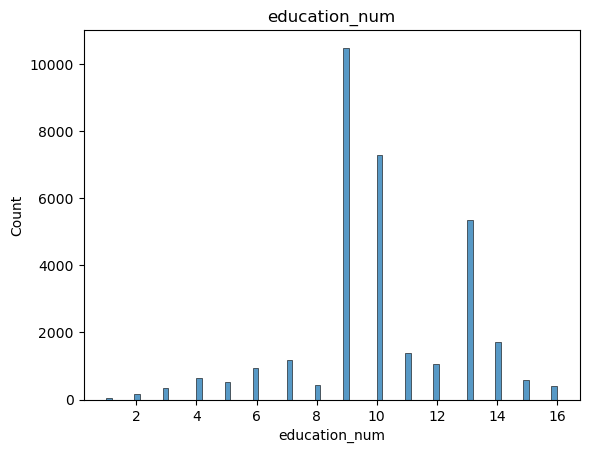

[Text(0.5, 1.0, 'education_num')] None


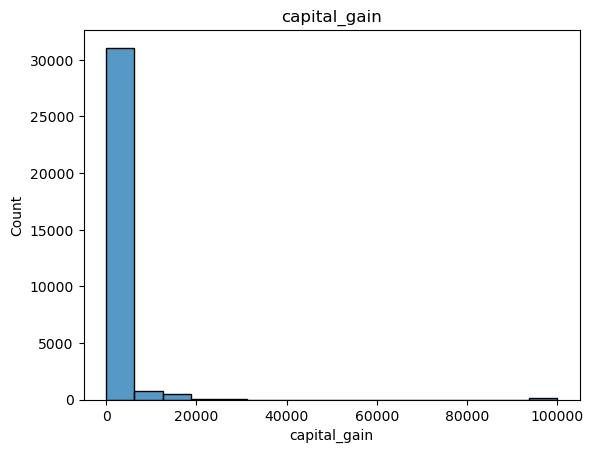

[Text(0.5, 1.0, 'capital_gain')] None


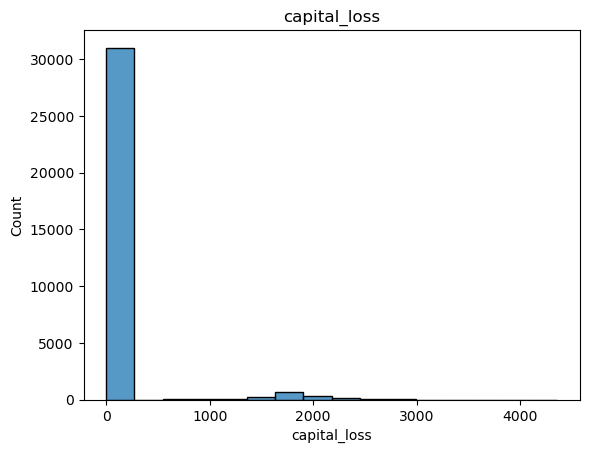

[Text(0.5, 1.0, 'capital_loss')] None


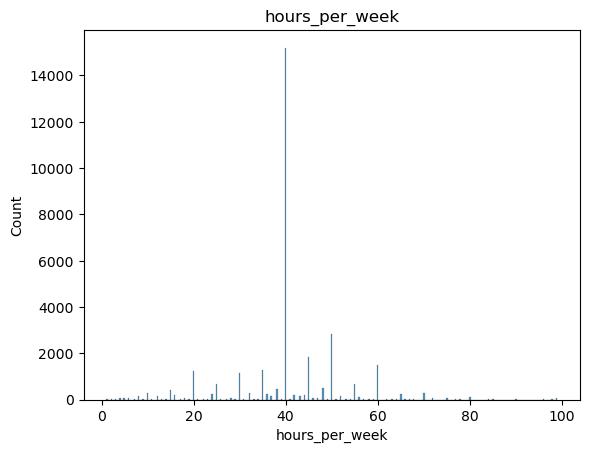

[Text(0.5, 1.0, 'hours_per_week')] None


In [12]:
plot_num(df_numeric)

## Tratamiento de las variables independientes categóricas (X)

In [13]:
#trabajamos solo con las variables categóricas
df_categoric = df_noduplo.select_dtypes(include=["object"])

In [14]:
# Transformación de Object a Categóricas
#for column in df_categoric:
    #df_noduplo[column] = pd.Categorical(df_noduplo[column])

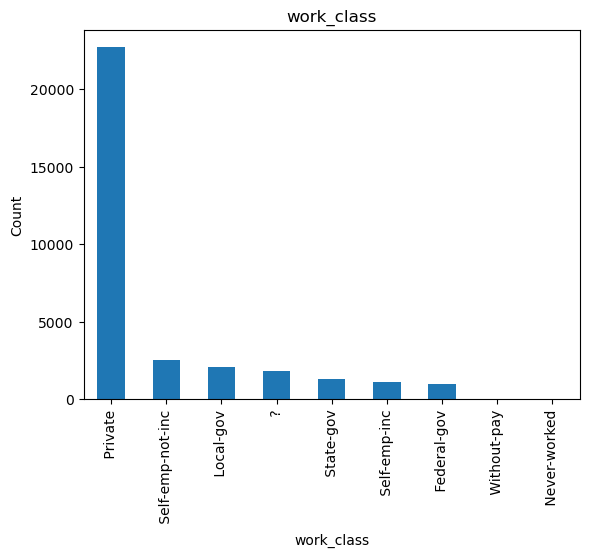

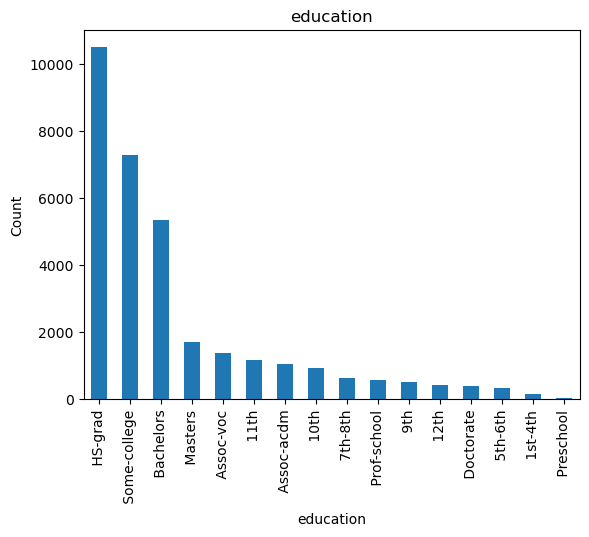

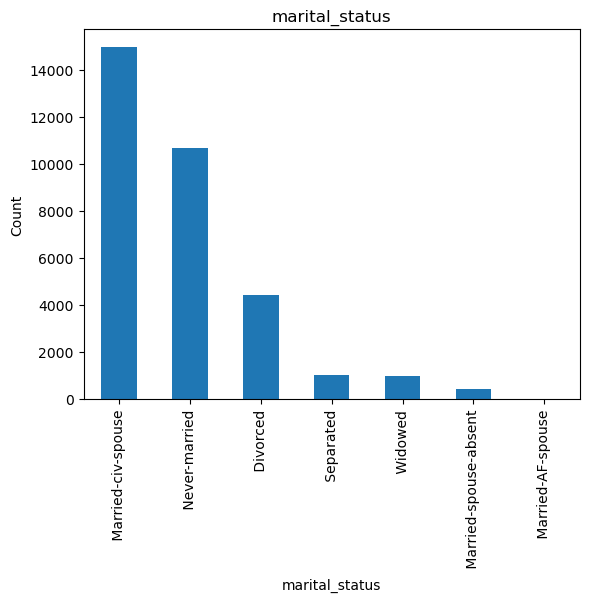

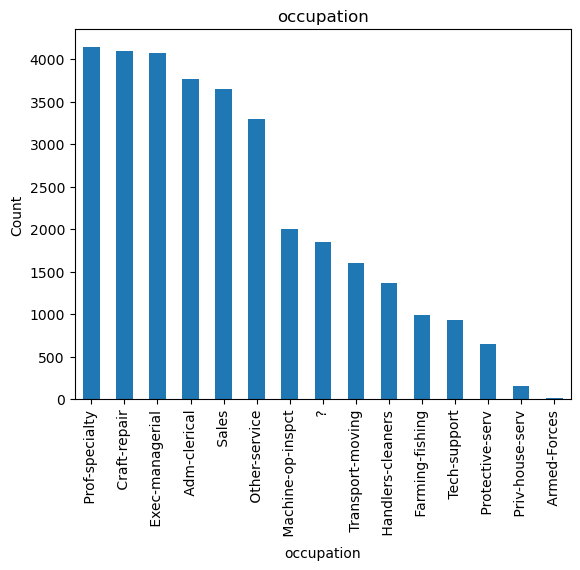

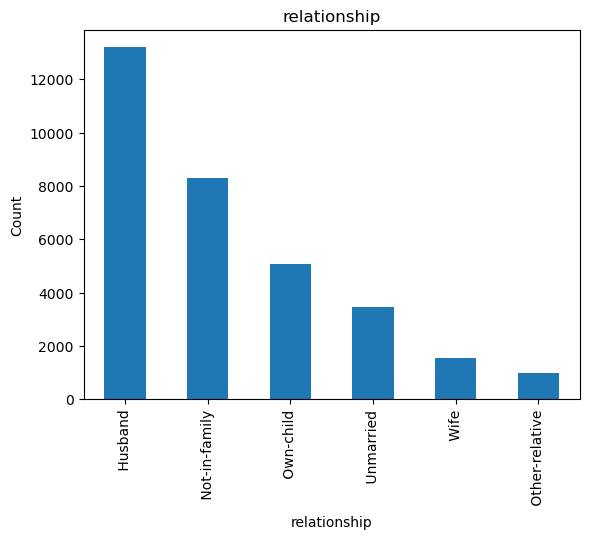

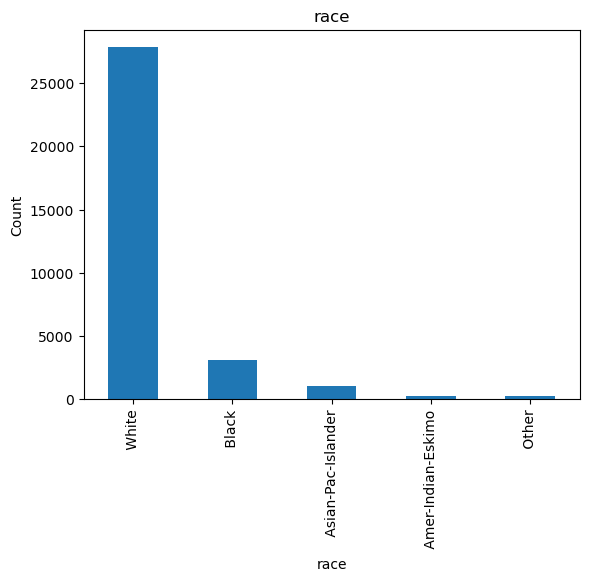

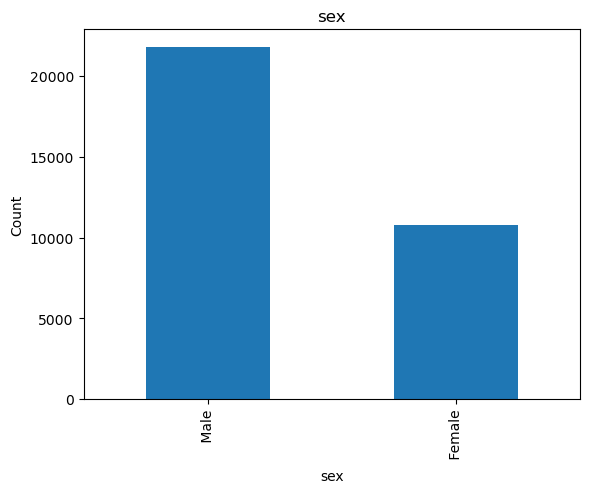

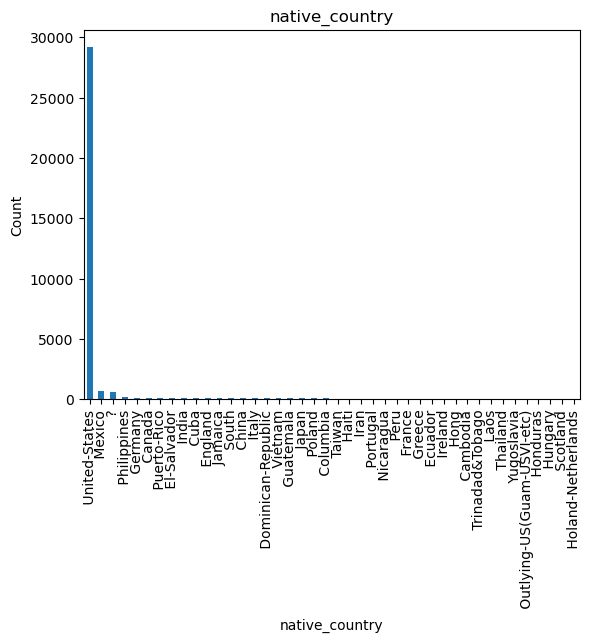

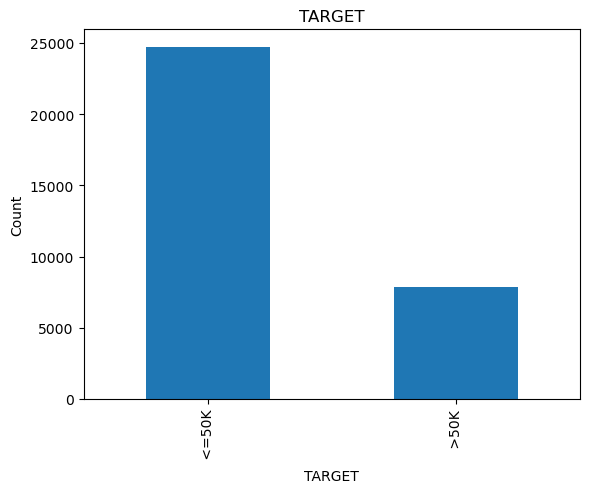

In [15]:
 #create a bar chart for each categorical column:
for column in df_categoric:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Analizamos cada una de las variables categoricas una a una y ver como las tratamos

In [16]:
df_prueba= df_noduplo.copy()

In [17]:
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32536 non-null  int64 
 1   work_class      32536 non-null  object
 2   fnlwgt          32536 non-null  int64 
 3   education       32536 non-null  object
 4   education_num   32536 non-null  int64 
 5   marital_status  32536 non-null  object
 6   occupation      32536 non-null  object
 7   relationship    32536 non-null  object
 8   race            32536 non-null  object
 9   sex             32536 non-null  object
 10  capital_gain    32536 non-null  int64 
 11  capital_loss    32536 non-null  int64 
 12  hours_per_week  32536 non-null  int64 
 13  native_country  32536 non-null  object
 14  TARGET          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


### WORK_CLASS

In [18]:
df_prueba.work_class.value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: work_class, dtype: int64

In [19]:
df_prueba.work_class.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
def selector_nivel (s):
    
    private=[' Private']
    nonprivate=[' Self-emp-not-inc',' Local-gov',' ?',' State-gov',' Self-emp-inc',' Federal-gov',' Without-pay',' Never-worked' ]
    
    
    if s in private:
        return 1
    elif s in nonprivate:
        return 2
   

In [21]:
df_prueba['work_class']=df_prueba['work_class'].apply(selector_nivel)
df_prueba

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,TARGET
0,50,2,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,1,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,1,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,1,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,1,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,1,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,1,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,1,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
#consideramos que no es importante
from sklearn.preprocessing import LabelEncoder
laben = LabelEncoder()


### Relationship

In [23]:
df_prueba.relationship= laben.fit_transform(df_prueba.relationship.values)

In [24]:
#consideramos que no es importante, poque la ocupacion, va a estar determinada por el nivel educativo....(VERIFICAR EN LA MATRIS DE CORRELACION, PARA VER SI HAY MULTICOLINEALIDAD)
df_prueba.occupation= laben.fit_transform(df_prueba.occupation.values)

### Education

In [25]:
df_prueba.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [26]:
def selector_nivel (s):
    
    n_bajo=[' 11th',' 10th',' 7th-8th',' 9th',' 12th',' 5th-6th',' 1st-4th',' Preschool']
    n_medio=[' Assoc-acdm',' Bachelors',' HS-grad',' Assoc-voc']
    n_alto=[' Masters',' Doctorate',' Prof-school']
    
    if s in n_bajo:
        return 0
    elif s in n_medio:
        return 1
    else:
        return 2
    
 


In [27]:
df_prueba['education']=df_prueba['education'].apply(selector_nivel)

### marital_status

In [28]:
df_prueba.marital_status= laben.fit_transform(df_prueba.marital_status.values)


### race

In [29]:
df_noduplo['race'].unique() #espacios en blanco


array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [30]:
def selector_nivel (s):
    
    white=[' White']
    others=[' Black',' Asian-Pac-Islander',' Amer-Indian-Eskimo',' Other' ]
    
    
    if s in white:
        return 1
    elif s in others:
        return 2
   


In [31]:

df_prueba['race']=df_prueba['race'].apply(selector_nivel)


### sexo

In [32]:
def selector_nivel (s):
    
    male=[' Male']
    female=[' Female']
    
    
    if s in male:
        return (1)
    elif s in female:
        return (2)
   

In [33]:
df_prueba['sex']=df_prueba['sex'].apply(selector_nivel)


### native_country

In [34]:
def selector_nivel (s):
    
    EEUU=[' United-States']
    other_countries=[' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands']
    
    if s in EEUU:
        return 1
    elif s in other_countries:
        return 2
   

In [35]:
df_prueba['native_country']=df_prueba['native_country'].apply(selector_nivel)

In [36]:
df_prueba

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,TARGET
0,50,2,83311,1,13,2,4,0,1,1,0,0,13,1,<=50K
1,38,1,215646,1,9,0,6,1,1,1,0,0,40,1,<=50K
2,53,1,234721,0,7,2,6,0,2,1,0,0,40,1,<=50K
3,28,1,338409,1,13,2,10,5,2,2,0,0,40,2,<=50K
4,37,1,284582,2,14,2,4,5,1,2,0,0,40,1,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,257302,1,12,2,13,5,1,2,0,0,38,1,<=50K
32556,40,1,154374,1,9,2,7,0,1,1,0,0,40,1,>50K
32557,58,1,151910,1,9,6,1,4,1,2,0,0,40,1,<=50K
32558,22,1,201490,1,9,4,1,3,1,1,0,0,20,1,<=50K


ahora tenemos todas las variables x numericas

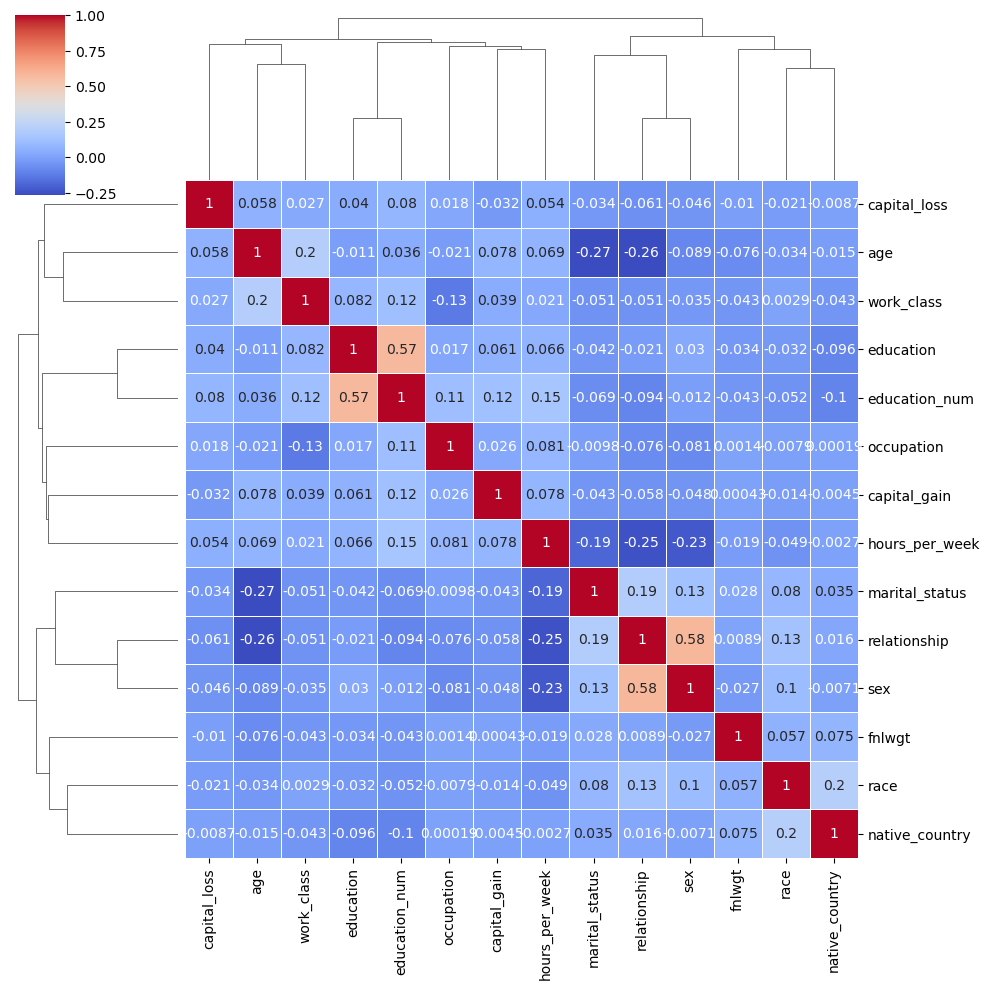

In [37]:
#Correlacion sin sacar outliers
corr_matrix = df_prueba.corr()

# Crear el heatmap de correlación utilizando Seaborn
g = sns.clustermap(corr_matrix, cmap='coolwarm', figsize=(10, 10), col_cluster=True, row_cluster=True, annot=True, linewidths=.5)
plt.show()

In [38]:
for col1 in corr_matrix:
    for col2 in corr_matrix:
        if col1 != col2 and corr_matrix[col1][col2] > 0.5:
            print(f"La correlación entre {col1} y {col2} es {corr_matrix[col1][col2]:.2f}")

La correlación entre education y education_num es 0.57
La correlación entre education_num y education es 0.57
La correlación entre relationship y sex es 0.58
La correlación entre sex y relationship es 0.58


In [39]:
#tenemos que quitar una porque mantienen una alta correlacion de variables xi,xj entre si
df_pruebaa=df_prueba.drop(['relationship','fnlwgt','education_num'],axis=1)
df_pruebaa

,age,work_class,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,TARGET
0,50,2,1,2,4,1,1,0,0,13,1,<=50K
1,38,1,1,0,6,1,1,0,0,40,1,<=50K
2,53,1,0,2,6,2,1,0,0,40,1,<=50K
3,28,1,1,2,10,2,2,0,0,40,2,<=50K
4,37,1,2,2,4,1,2,0,0,40,1,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,1,2,13,1,2,0,0,38,1,<=50K
32556,40,1,1,2,7,1,1,0,0,40,1,>50K
32557,58,1,1,6,1,1,2,0,0,40,1,<=50K
32558,22,1,1,4,1,1,1,0,0,20,1,<=50K


### tratamiento variable target (Y)

In [40]:
df_pruebaa['TARGET'].value_counts()

 <=50K    24697
 >50K      7839
Name: TARGET, dtype: int64

In [41]:
def selector_nivel (s):
    
    menor=' <=50K'
    mayor=' >50K'
    
    
    if s == menor:
        return 1
    else:
        return 2

In [42]:
df_pruebaa['TARGET']=df_pruebaa['TARGET'].apply(selector_nivel)
df_pruebaa

,age,work_class,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,TARGET
0,50,2,1,2,4,1,1,0,0,13,1,1
1,38,1,1,0,6,1,1,0,0,40,1,1
2,53,1,0,2,6,2,1,0,0,40,1,1
3,28,1,1,2,10,2,2,0,0,40,2,1
4,37,1,2,2,4,1,2,0,0,40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,1,2,13,1,2,0,0,38,1,1
32556,40,1,1,2,7,1,1,0,0,40,1,2
32557,58,1,1,6,1,1,2,0,0,40,1,1
32558,22,1,1,4,1,1,1,0,0,20,1,1


### Análisis de correlación conjunta

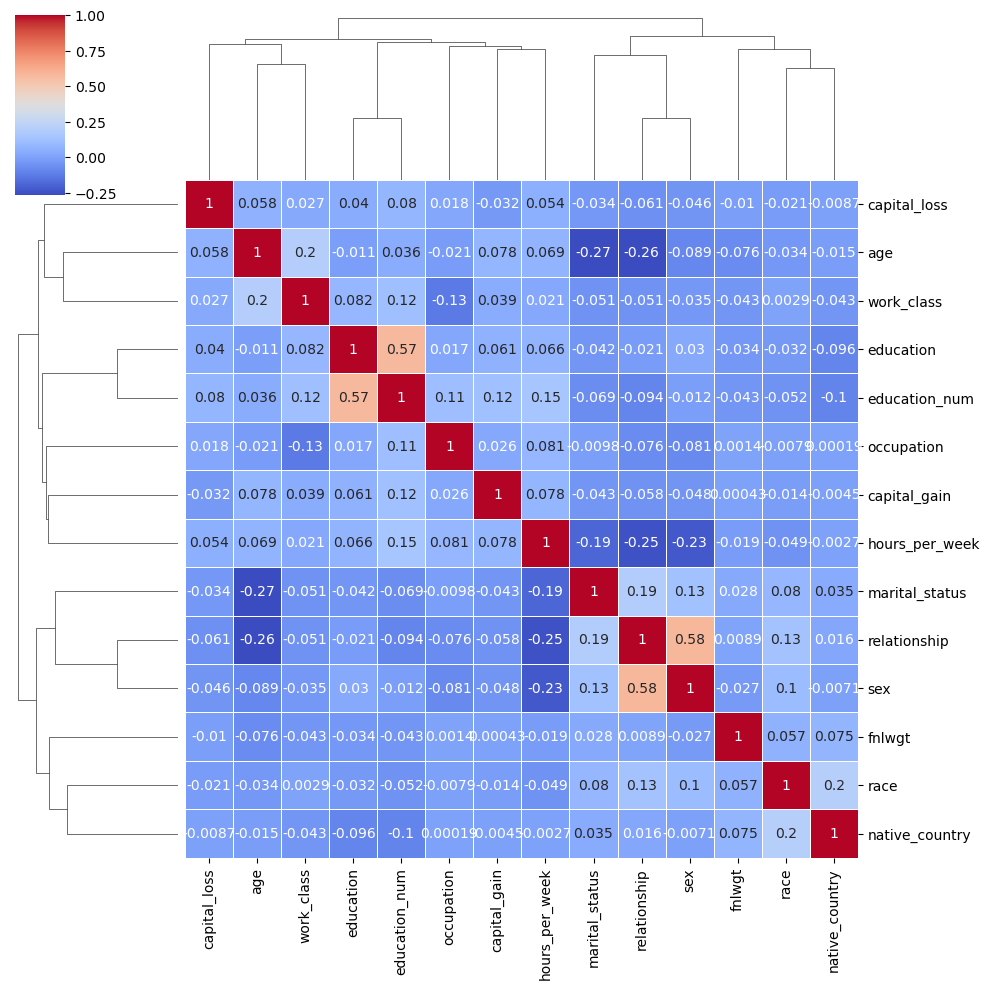

In [43]:
#Correlacion sin sacar outliers
corr_matrixx = df_pruebaa.corr()

# Crear el heatmap de correlación utilizando Seaborn
g = sns.clustermap(corr_matrix, cmap='coolwarm', figsize=(10, 10), col_cluster=True, row_cluster=True, annot=True, linewidths=.5)
plt.show()

In [44]:
for col1 in corr_matrixx:
    for col2 in corr_matrixx:
        if col1 != col2 and corr_matrixx[col1][col2] > 0.5:
            print(f"La correlación entre {col1} y {col2} es {corr_matrixx[col1][col2]:.2f}")

Entre la variable y y las variables X no hay una correlacion alta, por lo que no quitamos ninguna otra columna

### outliers

In [45]:
#CHEQUEA LOS OUTLIERS

def check_outliers(df, cols, store=False):
    """
    La función toma un dataframe, una lista de columnas y un booleano store.
    Si store=False, solo imprime la cantidad de outliers que hay en cada columna de la lista.
    Si store=True, devuelve un diccionario que tiene como claves los nombres de las
    columnas y como valores los indices de los outliers de cada una de ellas.
    
    Parameters
    ----------
    df: Dataframe
    cols: list
    store: bool
    
    Returns
    -------
    Si store=True:
        dict_outliers: dict
    """
    dict_outliers=dict()
    for i in cols:
        df_pruebaa = df[i]
        Q1 = df_pruebaa.quantile(0.25) # 1er cuartil
        Q3 = df_pruebaa.quantile(0.75)# 2do cuartil
        IQR = Q3-Q1 # interquartile range
        outlier_step = IQR * 1.5 
        outliers = df_pruebaa[~((df_pruebaa >= Q1 - outlier_step) & (df_pruebaa <= Q3 + outlier_step))].index.tolist()  
        dict_outliers[i]=outliers
        if not store:
            print('Para la variable {} hay {} outliers'.format(i, len(outliers)))
    if store:
        return dict_outliers

In [46]:
df_numeric_noduplo= df_pruebaa.select_dtypes(include=["int64", "float64"])

check_outliers(df_pruebaa, df_numeric_noduplo)

Para la variable age hay 142 outliers
Para la variable work_class hay 0 outliers
Para la variable education hay 0 outliers
Para la variable race hay 4742 outliers
Para la variable sex hay 0 outliers
Para la variable capital_gain hay 2711 outliers
Para la variable capital_loss hay 1519 outliers
Para la variable hours_per_week hay 9002 outliers
Para la variable native_country hay 3384 outliers
Para la variable TARGET hay 7839 outliers


### Aplico el test de normalidad

aplico el test de normalidad al dataframe que son todas numéricas. Ninguna tiene distribucion normal, por lo tanto hay que mirar la simetria para ver porque medida central se reemplaza.

In [47]:
from scipy.stats import shapiro

for col  in df_pruebaa:
    # Aplicamos shapiro
    stat, p = shapiro(df_pruebaa[col])

    print('Valor de test=%.3f, p-value=%.3f' % (stat, p))
    # Interpretación de resultados
    alpha = 0.05
    if p > alpha:
        print('The feature ',col, ' comes from a normal distribution (we fail to reject H0) \n')
    else:
        print('The feature ',col, \
              ' does not come from a normal distribution (we reject H0), therefore H1 \n')

Valor de test=0.967, p-value=0.000
The feature  age  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.578, p-value=0.000
The feature  work_class  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.781, p-value=0.000
The feature  education  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.864, p-value=0.000
The feature  marital_status  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.936, p-value=0.000
The feature  occupation  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.420, p-value=0.000
The feature  race  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.594, p-value=0.000
The feature  sex  does not come from a normal distribution (we reject H0), therefore H1 

Valor de test=0.123, p-value=0.000
The feature  capital_gain  does not come from a normal dis

### Empezamos el análisis de la regresion logistica

In [48]:
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [49]:
X = df_pruebaa.drop('TARGET', axis=1)
y = df_pruebaa['TARGET']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Estandarizo

In [51]:
from sklearn.preprocessing import StandardScaler

# Creamos una instancia del StandardScaler
scaler = StandardScaler()

# Ajustamos el scaler a nuestros datos de entrenamiento
scaler.fit(X_train)

# Transformamos nuestros datos de entrenamiento y prueba utilizando el scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. APLICO EL MODELO DE REGRESION

In [52]:
# instancia del modelo
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train, y_train)                                               # hay hiperparametros que se pueden pasar,LEER LA DOCUMENTACION

LogisticRegression(max_iter=10000)

### evaluacion

In [53]:
y_pred = logisticRegr.predict(X_test)

print('El accuracy de nuestra regresión logística en el set de test es: {:.2f}'.format(logisticRegr.score(X_test, y_test)))

El accuracy de nuestra regresión logística en el set de test es: 0.80


In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.800707
Precision: 0.820024
Recall: 0.946169
F1 score: 0.878592


### matriz de confusion

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix = confusion_matrix(y_test, y_pred) #SIENDO Y_TEST EL VALOR REAL Y Y_PREDI LA PREDCIION
print(confusion_matrix)

[[4693  267]
 [1030  518]]


[[4693  267]
 [1030  518]]


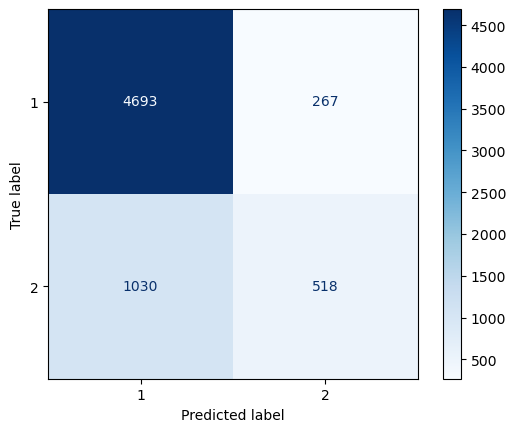

In [57]:

from sklearn.metrics import plot_confusion_matrix
class_names = [1, 2]

disp = plot_confusion_matrix(logisticRegr, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues)

print(disp.confusion_matrix)

### curva roc

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

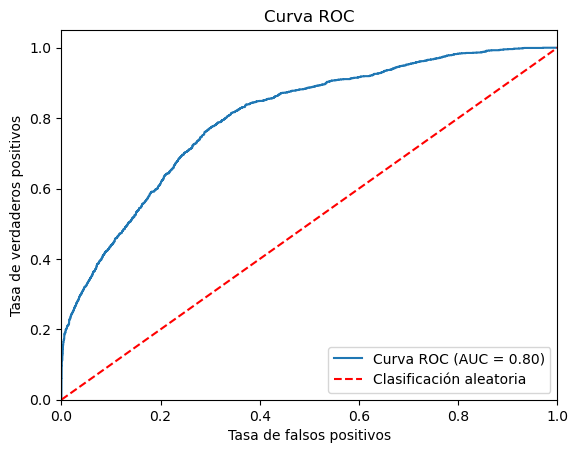

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import auc

logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1], pos_label=2)

# Calcular el área bajo la curva ROC (AUC-ROC)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--', label='Clasificación aleatoria')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### 2. Arbol de decision

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Criterio gini

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
# Instanciamos el modelo y lo introducimos en el conjunto de autos
arbol = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0)
arbol.fit(X_train,y_train)
print('Accuracy en entrenamiento: %f' % accuracy_score(y_train,arbol.predict(X_train)))
print('Accuracy en test: %f' % accuracy_score(y_test,arbol.predict(X_test)))

Accuracy en entrenamiento: 0.802905
Accuracy en test: 0.801014


In [63]:
print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))

              precision    recall  f1-score   support

           1       0.80      1.00      0.88      4960
           2       0.93      0.18      0.30      1548

    accuracy                           0.80      6508
   macro avg       0.86      0.59      0.59      6508
weighted avg       0.83      0.80      0.74      6508



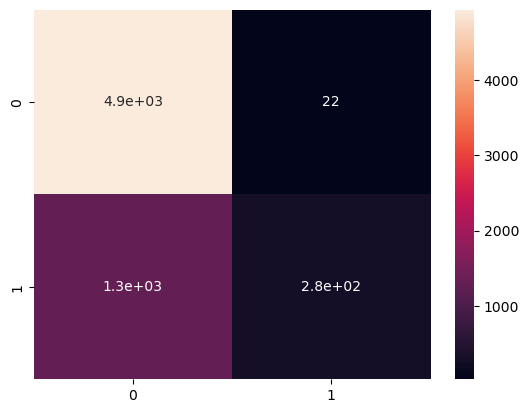

In [64]:
# Visualicemos los errores de este árbol en una matriz de confusión
cf_matrix = confusion_matrix(y_test, arbol.predict(X_test))
sns.heatmap(cf_matrix, annot=True);

### 3. Knn

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

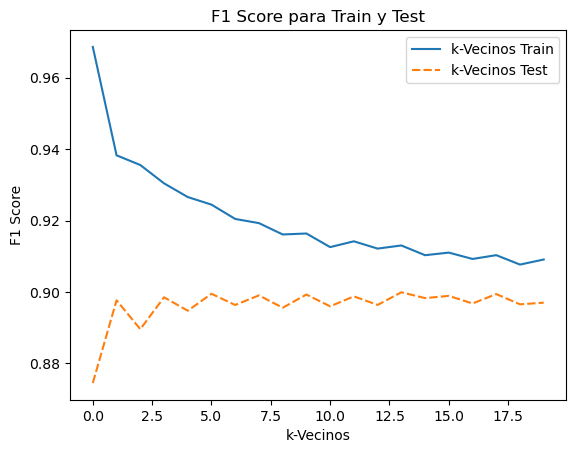

In [66]:
k=20
lista_kvecinos_train=[]
lista_kvecinos_test=[]
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # KNN model
    modelo = KNeighborsClassifier(n_neighbors=(i+1))
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)

    # Calcular los puntajes F1 para el conjunto de entrenamiento y prueba
    y_train_pred = modelo.predict(X_train)
    f1_train = f1_score(y_train, y_train_pred)

    y_test_pred = modelo.predict(X_test)
    f1_test = f1_score(y_test, y_test_pred)
    
    lista_kvecinos_train.append(f1_train)
    lista_kvecinos_test.append(f1_test)
    
# Graficar los puntajes F1
import matplotlib.pyplot as plt

listas = pd.DataFrame({'k-Vecinos Train': lista_kvecinos_train, 'k-Vecinos Test': lista_kvecinos_test})

# Trazar la gráfica
sns.lineplot(data=listas)
plt.xlabel('k-Vecinos')
plt.ylabel('F1 Score')
plt.title('F1 Score para Train y Test')
plt.show()

### evaluacion KNN

In [67]:
# Metrics
print("- Accuracy: ", round(accuracy_score(y_test, y_pred), 2))
print("- Precision:", round(precision_score(y_test, y_pred),2))
print("- Recall:", recall_score(y_test, y_pred))
print("- Fscore:", round(f1_score(y_test, y_pred),2))

- Accuracy:  0.84
- Precision: 0.87
- Recall: 0.9245967741935484
- Fscore: 0.9
